<a href="https://colab.research.google.com/github/ramkumar997/Data_Science/blob/main/Business%20case/Business_Case_Netflix_Data_Exploration_and_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To whoemever correcting this.  I didn't learn the pandas module correctly due to my inconsistency, so I haven't performed this analysis well.  Currently I am on course pause.  I'll be re-trying this after some days.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget "https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv" -O netflix.csv

--2023-08-08 05:48:32--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 18.65.40.189, 18.65.40.103, 18.65.40.200, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|18.65.40.189|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3399671 (3.2M) [text/plain]
Saving to: ‘netflix.csv’

netflix.csv         100%[===================>]   3.24M  --.-KB/s    in 0.06s   

2023-08-08 05:48:33 (51.1 MB/s) - ‘netflix.csv’ saved [3399671/3399671]



In [ ]:
df=pd.read_csv('netflix.csv')

# **Analysing Basic metrics**

In [ ]:
#Shape of data
df.shape

(8807, 12)

In [ ]:
#data types of all the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
#Statistical summary of release_year
mov=df[df['type']=='Movie']
mov['release_year'].describe()

count    6131.000000
mean     2013.121514
std         9.678169
min      1942.000000
25%      2012.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

# **Cleaning data**

In [ ]:
# changing duration numerical value
df['duration']=df['duration'].str.replace(' min','',case=False)
df['duration']=df['duration'].str.replace(' Seasons','',case=False)
df['duration']=df['duration'].str.replace(' Season','',case=False)

# **Basic Analysis**

a. Un-nest the columns those have cells with multiple comma separated values by
creating multiple rows

A.For categorical variables with null values, update those rows as
unknown_column_name.

In [ ]:
df['director'].fillna('No director',inplace=True)
df['cast'].fillna('No cast',inplace=True)
df['country'].fillna('No country',inplace=True)
df['rating'].fillna('No rating',inplace=True)
df['date_added'].fillna('No data',inplace=True)

B. Replace with 0 for continuous variables having null values.

In [ ]:
df['duration'].fillna(0,inplace=True)

In [ ]:
df.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No cast,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,No director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",No country,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,No director,No cast,No country,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,No director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,No director,No cast,No country,"July 1, 2019",2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# **What does ‘good’ look like?**

**1. Find the counts of each categorical variable both using graphical and non-graphical analysis.**

**a. For Non-graphical Analysis:**

In [ ]:
#number of movies and tv shows
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [ ]:
#number of directors
df['director']=df['director'].str.split(", ")
dir=df.explode('director')
dir['director'].value_counts()

No director       2634
Rajiv Chilaka       22
Jan Suter           21
Raúl Campos         19
Suhas Kadav         16
                  ... 
Raymie Muzquiz       1
Stu Livingston       1
Joe Menendez         1
Eric Bross           1
Mozez Singh          1
Name: director, Length: 4994, dtype: int64

In [ ]:
#number of cast
df['cast']=df['cast'].str.split(", ")
cast=df.explode('cast')
cast['cast'].value_counts()

No cast                    825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Naseeruddin Shah            32
                          ... 
Melanie Straub               1
Gabriela Maria Schmeide      1
Helena Zengel                1
Daniel Valenzuela            1
Chittaranjan Tripathy        1
Name: cast, Length: 36440, dtype: int64

In [ ]:
#number of movies per country
df['country']=df['country'].str.split(", ")
country=df.explode('country')
country['country'].value_counts()

United States     3689
India             1046
No country         831
United Kingdom     804
Canada             445
                  ... 
Bermuda              1
Ecuador              1
Armenia              1
Mongolia             1
Montenegro           1
Name: country, Length: 128, dtype: int64

**b. For graphical analysis:**

<Axes: xlabel='type', ylabel='count'>

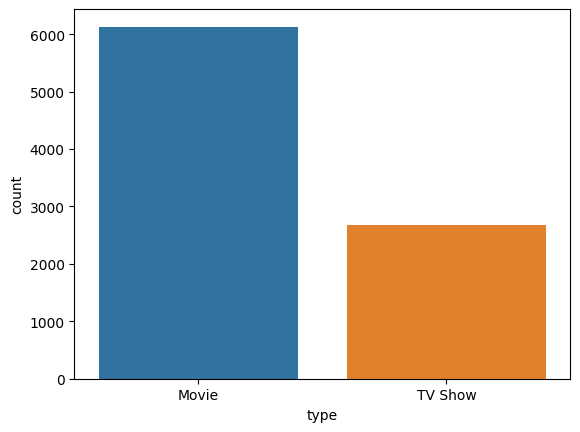

In [ ]:
#viz of number of movies and tv shows
sns.countplot(x='type',data=df,order=df['type'].value_counts().index,)

**2. Comparison of tv shows vs. movies.**

a. Find the number of movies produced in each country and pick the top 10
countries

In [ ]:
con=country[country['type']=='Movie']
con1=con.groupby(['country'])
con2=con1.size().sort_values(ascending=False)
con2.head(10)

country
United States     2751
India              962
United Kingdom     532
No country         440
Canada             319
France             303
Germany            182
Spain              171
Japan              119
China              114
dtype: int64

b. Find the number of Tv-Shows produced in each country and pick the top 10
countries.

In [ ]:
con=country[country['type']=='TV Show']
con1=con.groupby(['country'])
con2=con1.size().sort_values(ascending=False)
con2.head(10)

country
United States     938
No country        391
United Kingdom    272
Japan             199
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          66
dtype: int64

**3. What is the best time to launch a TV show?**

a. Find which is the best week to release the Tv-show or the movie. Do the analysis
separately for Tv-shows and Movies

In [ ]:
df['month_added']=pd.DatetimeIndex(df.date_added).month
df['week_added']=pd.DatetimeIndex(df.date_added).week
df['day_added']=pd.DatetimeIndex(df.date_added).day
df['week_day']=pd.DatetimeIndex(df.date_added).weekday

<ipython-input-26-f03257c1e7ac>:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['week_added']=pd.DatetimeIndex(df.date_added).week


In [ ]:
#Best week to launch a TV Show
Type=df[df['type']=='TV Show']
Type1=Type.groupby(['week_added'])
Type2=Type1.size().sort_values(ascending=False)
Type2

week_added
27.0    86
31.0    83
13.0    76
44.0    75
24.0    75
35.0    74
5.0     73
26.0    73
40.0    72
50.0    70
37.0    69
18.0    61
48.0    60
22.0    60
1.0     56
39.0    55
15.0    52
52.0    52
51.0    51
38.0    51
46.0    51
32.0    49
14.0    49
33.0    48
11.0    48
9.0     47
29.0    46
20.0    46
17.0    45
49.0    45
36.0    45
42.0    45
30.0    44
53.0    43
19.0    43
25.0    42
12.0    42
34.0    41
28.0    41
7.0     41
21.0    41
23.0    39
8.0     38
45.0    37
16.0    36
47.0    35
6.0     33
4.0     32
3.0     32
41.0    32
2.0     30
10.0    28
43.0    28
dtype: int64

In [ ]:
#Best week to launch a movie
Type=df[df['type']=='Movie']
Type3=Type.groupby(['week_added'])
Type4=Type1.size().sort_values(ascending=False)
Type4

week_added
27.0    86
31.0    83
13.0    76
44.0    75
24.0    75
35.0    74
5.0     73
26.0    73
40.0    72
50.0    70
37.0    69
18.0    61
48.0    60
22.0    60
1.0     56
39.0    55
15.0    52
52.0    52
51.0    51
38.0    51
46.0    51
32.0    49
14.0    49
33.0    48
11.0    48
9.0     47
29.0    46
20.0    46
17.0    45
49.0    45
36.0    45
42.0    45
30.0    44
53.0    43
19.0    43
25.0    42
12.0    42
34.0    41
28.0    41
7.0     41
21.0    41
23.0    39
8.0     38
45.0    37
16.0    36
47.0    35
6.0     33
4.0     32
3.0     32
41.0    32
2.0     30
10.0    28
43.0    28
dtype: int64

b. Find which is the best month to release the Tv-show or the movie. Do the
analysis separately for Tv-shows and Movies

In [ ]:
#Best month to launch a TV Show
Type=df[df['type']=='TV Show']
Type1=Type.groupby(['month_added'])
Type2=Type1.size().sort_values(ascending=False)
Type2

month_added
12.0    266
7.0     262
9.0     251
6.0     236
8.0     236
10.0    215
4.0     214
3.0     213
11.0    207
5.0     193
1.0     192
2.0     181
dtype: int64

In [ ]:
#Best week to launch a movie
Type=df[df['type']=='TV Show']
Type3=Type.groupby(['month_added'])
Type4=Type1.size().sort_values(ascending=False)
Type4

month_added
12.0    266
7.0     262
9.0     251
6.0     236
8.0     236
10.0    215
4.0     214
3.0     213
11.0    207
5.0     193
1.0     192
2.0     181
dtype: int64

**4. Analysis of actors/directors of different types of shows/movies.**

a. Identify the top 10 directors who have appeared in most movies or TV shows.

In [ ]:
#number of directors
df['director']=df['director'].str.split(", ")
dir=df.explode('director')
#dir1=dir['director'].value_counts()
dir1=dir.groupby('director')['title'].value_counts()
dir2=dir1.sort_values(ascending=False)
dir2.head(10)

director           title                   
Miguel Cohan       Blood Will Tell             2
A. L. Vijay        Abhinetri                   1
Oliver Stone       Snowden                     1
Olivier Afonso     Girls With Balls            1
Olivier Abbou      Get In                      1
Olivia Newman      First Match                 1
Olivia Milch       Dude                        1
Olivia M. Lamasan  The Mistress                1
                   Starting Over Again         1
                   Barcelona: A Love Untold    1
Name: title, dtype: int64